# Einphasige elektrische Geräte mit dem Energielogger vermessen

## python konfigurieren

### Module importieren

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import locale
from distutils.spawn import find_executable


print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.2
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/datetime.py'>
holidays 0.11.2
seaborn 0.11.2
plotly 5.1.0
sys 3.9.6 (default, Aug 18 2021, 19:38:01) 
[GCC 7.5.0]
os <module 'os' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/os.py'>
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/locale.py'>


### Grafikparameter einstellen

In [4]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

### Funktionen definieren

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>LERNZIELE</b></div>
    <ul>
        <li> Funktionsweise des Energieloggers kennen </li>
        <li> mit einem Anleitungsvideo und Codebeispielen zum Auslesen </li>
        <li> um für die Projekte sinnvolle Messungen durchführen zu können</li>
    </ul>
</div>

Im Video LINK EINFÜGEN zeige ich Ihnen, wie der Energielogger bedient wird.

## Ausleihe

<div class="admonition warning" style="background: #fff9e5; padding: 10px">
<div class="title"><b>Wichtig: Energielogger direkt nach dem Erhalt testen und zum vereinbarten Termin zurückgeben oder -senden!</b></div>
Es gibt manchmal Probleme mit den Energieloggern. Dann kann ich Ihnen ein Ersatzgerät ausleihen. Damit das klappt, müssen Sie sich bis eine Woche nach Erhalt melden. D.h. <b>testen Sie, ob das Gerät sinnvolle Daten misst (siehe Anleitung hier) und ob Sie die Daten übertragen können auf Ihren PC (und ob diese Sinn machen)</b>. Wer sich nicht rechtzeitig meldet, kann keine sinnvollen Daten messen und muss damit rechnen, dass er dann diese Daten auch nicht sinnvoll im Projekt nutzen kann, was also die Note im Projekt verschlechtern kann. Auch für diesen Versuch ist es notwendig, <b>im Projektteam einen Versuchsplan abzustimmen</b>, denn auch Ihre frei einteilbare Zeit während des Semesters ist ja begrenzt und es ist wichtig, dass Sie gut absprechen, wer welche Messungen macht. Planen Sie außerdem Zeit ein, um ggf. unplausible Messungen zu wiederholen.
</div>

<div class="admonition warning" style="background: #fff9e5; padding: 10px">
<div class="title"><b>Beachten Sie die Sicherheitshinweise in der Anleitung zum Energielogger.</b></div>
(siehe weiter unten im Text)!
</div>

<div class="admonition warning" style="background: #fff9e5; padding: 10px">
<div class="title"><b>Notwendige Software bzw. Hardware:</b></div>

- python und jupyter notebook für Notizen mit Auswertung
- USB-Stick, um Messdaten zu sichern
- voltcraft Energielogger Software (Link s.u.)
- SD-Kartenleser
</div>

<div class="admonition seealso" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Weiterführende Literatur:</b></div>

- [Voltcraft Energielogger 4000 Bedienungsanleitung](https://asset.conrad.com/media10/add/160267/c1/-/gl/000125444ML02/bedienungsanleitung-125444-voltcraft-energy-logger-4000-energiekosten-messgeraet-stromtarif-einstellbar-kostenprognose.pdf) {cite:p}``conrad_bedienungsanleitung_2020``
- [Voltsoft Standard Auswerte-Software](https://asset.conrad.com/media10/add/160267/c1/-/gl/000125444DL01/download-125444-voltcraft-energy-logger-4000-energiekosten-messgeraet-stromtarif-einstellbar-kostenprognose.zip)
- [Voltsoft Benutzerhandbuch](https://asset.conrad.com/media10/add/160267/c1/-/de/001435090ML01/bedienungsanleitung-1435090-temperatur-datenlogger-voltcraft-dl-200t-30-bis-60-c-pdf-funktion-kalibriert-nach-werksstandard-ohne-zertifi.pdf) {cite:p}``conrad_voltcraft_2020``
</div>

Laden Sie sich die obigen Bedienungsanleitungen und die Software herunter. Das Gerät ist ein Energiekostenmessgerät Energy Logger 4000 der Marke Voltcraft (Hausmarke der Firma Conrad).

Sie bekommen folgende Dinge ausgeliehen:
- Energy Logger 4000
- SanDisk SD-Karte 16 GB
- Knopfzelle (Batterie)
- Verpackung für den Energy Logger, bestehend aus Karton und Luftpolsterfolie
- Bedienungsanleitung für den Energy Logger
- Software

<div class="admonition warning" style="background: #fff9e5; padding: 10px">
<div class="title"><b>Wichtig: Alles pfleglich behandeln und pünktlich zurückgeben!</b></div>
Behandeln Sie alle ausgeliehenen Dinge während der Ausleihdauer pfleglich und setzen Sie das Gerät nur bestimmungsgemäß (wie in der Bedienungsanleitung beschrieben) ein. Geben Sie <b>alle oben genannten</b> Dinge auch wieder zurück. Sollte Ihnen ein Gerät oder die Elektroinstallation nicht vertrauenswürdig erscheinen, so darf der Energielogger nicht eingesetzt werden. Beachten Sie die Bedienungsanleitung. Geben Sie das Gerät nicht an andere weiter und verwenden Sie es nur selbst. Dass Sie das Gerät mitsamt dem genannten Zubehör wieder zurück geben und es in der Zwischenzeit bestimmungsgemäß einsetzen, dafür unterschreiben Sie in der hier verlinkten <a href="log/SYEenergieloggerausleihe.pdf">Erklärung</a>. Diese laden Sie in ilias hoch (Corona-Semester) bzw. geben Sie bei der Ausleihe ab (Präsenz).
</div>

## Inbetriebnahme

**Inbetriebnahme des Energieloggers**: 
- Setzen Sie als erstes die Pufferbatterie und die SD-Karte ein. 
- Folgen Sie dann der Beschreibung in der Bedienungsanleitung ab Seite 11 zur Einstellung von Geräte-ID und Zeit. 
- Löschen Sie außerdem den Datenspeicher MEM, da sonst Messdaten von früheren Versuchen bei der Auswertung zu Verwirrung führen könnten. Drücken Sie dafür die Taste MODE für mindestens 3 Sekunden. Der leere Datenspeicher wird mit der Anzeige MEM99% signalisiert.
- Nach der Inbetriebnahme schließen Sie nun nacheinander einen oder mehrere Verbraucher an und nehmen Sie ein Lastprofil auf. 
- Zur erstmaligen Datenübertragung benötigen Sie die voltsoft Software (Link s.o.), installiert auf Ihrem Computer
- Übertragen Sie die Messdaten wie in der Bedienungsanleitung beschrieben vom internen Speicher des Energieloggers auf die SD-Karte.
- Rechnen Sie bei längeren Lastprofilen damit, dass dieser Vorgang einige Minuten in Anspruch nehmen kann.
- Lesen Sie nun die Daten von der SD-Karte in die voltsoft-Software ein. Folgen Sie der Anleitung in der Hilfe-Datei. 
- Wichtig ist, in den Einstellungen im Menü des Energieloggers, die Logger ID einzustellen.
- Danach laden Sie die Daten herunter, indem Sie das Laufwerk anwählen, das die SD-Karte in Ihrem Rechner darstellt.
- Als nächstes wählen Sie unter Darstellung die gesamte Speicherkapazität aus (von minimalem bis maximalem Datum).
- Darauf können Sie die Daten als CSV exportieren.
- Setzen Sie danach die SD-Karte wieder im Logger ein, so dass dieser immer einsatzbereit ist.

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Dokumentation der Inbetriebnahme:</b></div>
Dokumentieren Sie hier die Inbetriebnahme des Loggers. Falls Fehler auftreten, schreiben Sie die hier auch auf. Und falls Sie herausfinden, wie man die Fehler löst, notieren Sie das ebenfalls hier, so dass Sie es wieder nachlesen können, wenn Sie Wochen später nochmals vor der gleichen Situation stehen. Falls Sie selbst ein Problem nicht lösen können, so melden Sie das bitte im SYE Forum in ilias. Sollten Sie bis zur nächsten Video-Veranstaltung keine Rückmeldung von mir haben, sprechen Sie das dort bitte auch nochmals an. Dann kann ich bei der Lösung des Problems behilflich sein.
</div>

*Antwort: Der Energielogger mit der Nummer ... wurde am (Datum) ... in Betrieb genommen und zwar von (Vorname, Nachname) .... Es erfolgte eine Messung eines Lastprofils eines ... (Gerät eintragen). Die Übertragung der Daten mit der voltsoft-Software in eine csv-Datei hat funktioniert.*

## Daten mit python auslesen

Zur ersten Auswertung in python hier auch noch eine Funktion, die es ermöglicht, die Energielogger-Daten in python einzulesen, erstellt von {cite:p}``maximilian_augsdorfer_projektdokumentation_2019``.

In [7]:
def read_energy_logger_file(path_to_file):

    # Check if path exists
    if not os.path.exists(path_to_file) or not os.path.isfile(path_to_file):
        raise Exception("No file at given path!")
        
    # Read data into pandas dataframe
    df = pd.read_csv(path_to_file, header = 7)

    # Rename columns
    df = df.rename(columns = {"Aufnahmezeit": "timestamp", "Stromstärke (A)": "Current [A]", "Wirkleistung (W)": "Active Power [W]", "Scheinleistung (W)": "Apparent Power [W]"})

    # Since the data provided by the energy logger
    # is not formated correctly for further usage,
    # each cell needs to be reformated.

    # Iterate through dataframe and reformat data
    for index, row in df.iterrows():
        
        # Reformat other columns
        for column in df.columns:
            if not column == "timestamp":
                
                # Get string from cell
                string = row[column].replace(",", ".")

                # Create float from string
                value = float(string)
                
                # Set reformated cell
                row[column] = value

    # Cast data types to float 64
    for column in df.columns:
        if not column == "timestamp":
            df = df.astype({column: 'float64'})
            
            
    # Store datetime object in timestamp
    df["timestamp"] = df["timestamp"].apply(lambda x: dt.datetime.strptime(x, "%d-%m-%Y %H:%M:%S"))

    return df

In [8]:
# Hier muss Ihr Dateiname eingefügt werden
energieloggertest = read_energy_logger_file('../data/Energieloggertestdaten.csv')
#energieloggertest.head()

timestamp  Current [A]  Active Power [W]  Apparent Power [W]
0 2020-11-14 11:02:00        0.028          1.248604              6.5716
1 2020-11-14 11:03:00        0.027          1.140642              6.3369
2 2020-11-14 11:04:00        0.027          1.140156              6.3342
3 2020-11-14 11:05:00        0.026          1.037374              6.1022
4 2020-11-14 11:06:00        0.026          1.099332              6.1074

<AxesSubplot:xlabel='timestamp'>

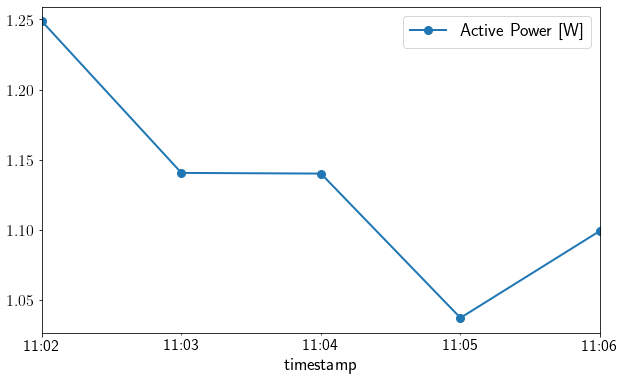

In [11]:
energieloggertest.plot(x='timestamp',y='Active Power [W]', linestyle = '-', marker = 'o')

## Genauigkeit

Es steht zwar ein wenig Information im Datenblatt, aber wir wollten es genauer wissen und haben auch nochmal nachgemessen: {cite:p}`kastenbutt_accuracy_2020`

# Literatur

```{bibliography}
:filter: docname in docnames
```